<div align="center">

# Customer Behavior Analysis

</div>

### Data-Driven Insights for Smarter Retail Decisions

**Analyst:** Abdou Salam Sisawo  
**Project Phase:** Data Preparation & Exploration  
**Stack:** Python | Pandas | NumPy | SQL | Power BI  

> *Goal:* Understand how customers shop, what influences their purchases,  
> and how the business can leverage data to optimize marketing & engagement.

---

In [1]:
# Load the dataset using pandas
import pandas as pd
df = pd.read_csv('customer_shopping_behavior.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [2]:
# get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [3]:
# display summary statistics of all columns (including categorical)
df.describe(include='all')

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3863.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.750065,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716983,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.800000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


In [4]:
# check for missing values 
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

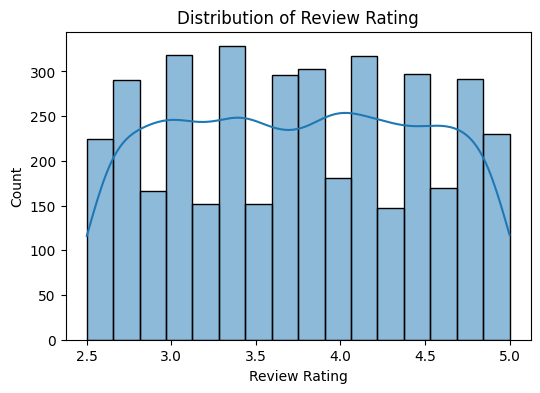

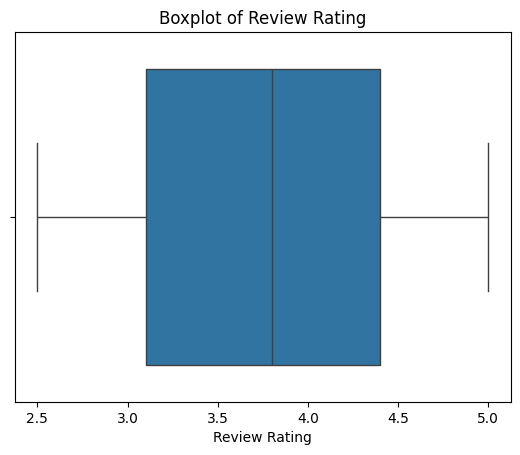

In [5]:
# Visualize the distribution of 'Review Rating' to guide how we handle missing values.
# Plotting helps reveal skewness or unusual patterns in the data,
# which informs whether mean, median, or mode is the most appropriate imputation method.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Review Rating'], kde=True)
plt.title("Distribution of Review Rating")
plt.show()

sns.boxplot(x=df['Review Rating'])
plt.title("Boxplot of Review Rating")
plt.show()

In [8]:
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [9]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [10]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [11]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.rename(columns={'purchase_amount_(usd)': 'purchase_amount'}, inplace=True)

In [12]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

In [13]:
# Create a column age_group based on age
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)

In [14]:
df[['age', 'age_group']].head(10)

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged
5,46,Middle-aged
6,63,Senior
7,27,Young Adult
8,26,Young Adult
9,57,Middle-aged


In [15]:
# create column purchase_frequency_days
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)
df['purchase_frequency_days'] = df['purchase_frequency_days'].astype('Int64')

df[['purchase_frequency_days', 'frequency_of_purchases']].head(10)

,purchase_frequency_days,frequency_of_purchases
0,14,Fortnightly
1,14,Fortnightly
2,7,Weekly
3,7,Weekly
4,365,Annually
5,7,Weekly
6,90,Quarterly
7,7,Weekly
8,365,Annually
9,90,Quarterly


In [16]:
df[['discount_applied', 'promo_code_used']].head(10)

,discount_applied,promo_code_used
0,Yes,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,Yes
5,Yes,Yes
6,Yes,Yes
7,Yes,Yes
8,Yes,Yes
9,Yes,Yes


In [17]:
(df['discount_applied'] == df['promo_code_used']).all()

np.True_

In [18]:
df = df.drop('promo_code_used', axis=1)

In [19]:
df.columns

Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'previous_purchases', 'payment_method',
       'frequency_of_purchases', 'age_group', 'purchase_frequency_days'],
      dtype='object')

In [20]:
df = df.loc[:, ~df.columns.duplicated()]

In [21]:
# Final check of the cleaned dataset
df.head()

,customer_id,age,gender,item_purchased,category,purchase_amount,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,previous_purchases,payment_method,frequency_of_purchases,age_group,purchase_frequency_days
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,14,Venmo,Fortnightly,Middle-aged,14
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,2,Cash,Fortnightly,Young Adult,14
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,23,Credit Card,Weekly,Middle-aged,7
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,49,PayPal,Weekly,Young Adult,7
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,31,PayPal,Annually,Middle-aged,365


In [22]:
pip install psycopg2-binary sqlalchemy

^C
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement psycopg2-binary (from versions: none)
ERROR: No matching distribution found for psycopg2-binary


In [ ]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# step 1: Connect to mysql database
# Replace with your actual database credentials
from sqlalchemy import create_engine

username = 'root'                # your username
password = '......'              # your password
host = 'localhost'               # your host, e.g., 'localhost' or an IP address
port = '3306'                    # your port, e.g., '3306' for MySQL
database = 'customer_behaviour'  # your database name

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# step 2: Load the cleaned dataframe into a new table in the database
table_name = 'customer'
df.to_sql('customer', con=engine, if_exists='replace', index=False)

# step 3: Verify the data has been loaded correctly
print(f"Data loaded into table '{table_name}' in database '{database}'.")

Data loaded into table 'customer' in database 'customer_behaviour'.
